# Project Report: The evolution of esports into a profession over the last ten years 

**Outline**
1. Introduction  
 1.1. Motivation  
 1.2. Questions  
2. Install and import dependencies
3. Methods  
 3.1. Data sources  
 3.2. Data pipeline  
4. Visualization and interpretation of results  
 4.1. Answering first question  
 4.2. Answering second question     
 4.3. Answering third question     
5. Discussion   
 5.1. Outlook  


## 1. Introduction

## 1.1. Motivation 

I have always been a big fan of gaming and found my way into the esports a few years ago and was part of that industry. Me, myself I used to be part of the esports of ‘Overwatch’ which is another first person shooter. Since the esports of CS:GO has been evolving a few years before there is more data available and therefore it makes more sense to analyse that game specifically but also as stated in my project-plan I wanna look at the cash in tournaments of other big games as well just to have a comparison and see if it’s just CS:GO or a whole industry in different kind of games. 

## 1.2. Questions 

- Q1: How much prize pool for the top 50 games? After I'll compare that to traditional sport leagues and trying to figure out why these games are at the top?    
- Q2: Is there a strong correlation between genre and prize pool?  
- Q3: How has the prize pool for the game CS:GO changed over the last three years?  

## 2. Install and import dependencies

In [1]:
%%capture
%pip install ftplib
%pip install squarify
%pip install scipy
%pip install ipython
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install shutil
%pip install sqlalchemy
%pip install zipfile

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import kde
from datetime import datetime
import re
import squarify
import seaborn as sns

## 3. Methods 

In this data engineering project I used the following methods:
- Gathering the data from kaggle which is an open source platform
- Cleaning the data which consists of removing unwanted data and renaming columns if it fits better
- Create a pipeline, test file and CI

## 3.1. Data sources

Datasource 1: LAST 2000 CSGO TOURNAMENT HLTV  
•Metadata URL: https://www.kaggle.com/datasets/merfarukgnaydn/last-2000-csgo-tournament-hltv  
•Data URL: https://www.kaggle.com/datasets/merfarukgnaydn/last-2000-csgo-tournament-hltv/download?datasetVersionNumber=1  
Data Type: CSV  
Information about the first 3 teams, prize, date, tournament location, tournament name, money and spot prizes of the last 2000 tournaments.  

Datasource 2: Esports Earnings 1998 - 2023  
•Metadata URL: https://www.kaggle.com/datasets/rankirsh/esports-earnings  
•Data URL: https://www.kaggle.com/datasets/rankirsh/esports-earnings/download?datasetVersionNumber=25  
Data Type: CSV  
Information about cash prizes distributed in various esports events from 1998 to 2023.  

## 3.2. Data pipeline

The data pipeline process involves loading the two datasets from their respective URL’s into a python script, performing data cleaning and transformation after. In the end these two datasets get saved in SQLite

## 4. Visualization and interpretation of results

## 4.1. Answering first question

In order to answer the Q1 I used two lollipop charts and I also reduced it to the 50 games with the most prize pool to have a clearer visualization.

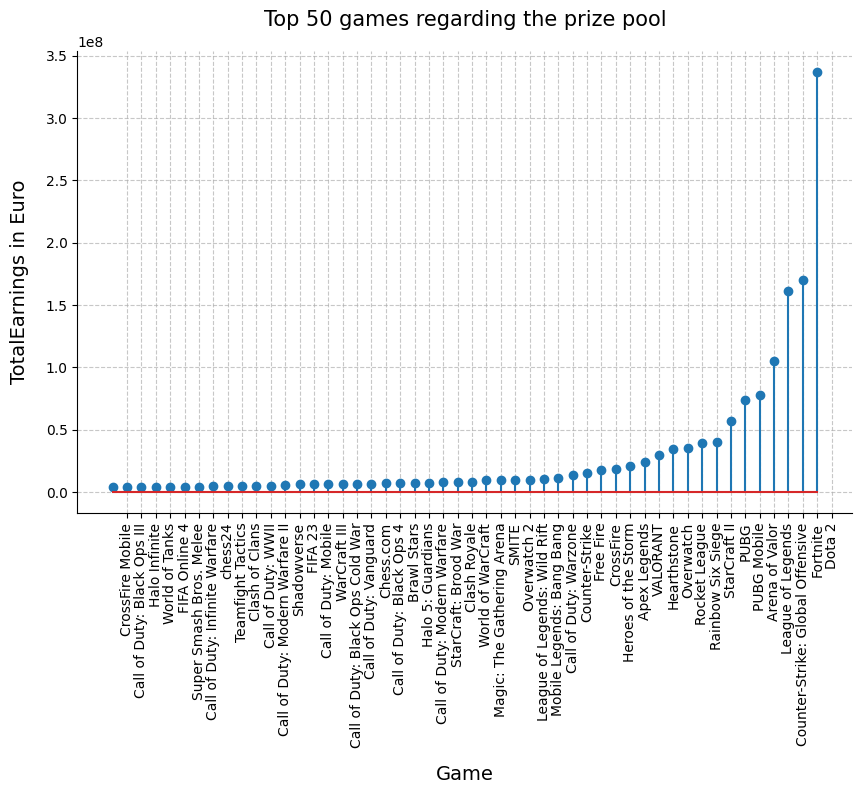

In [3]:
# Read the CSV file into a pandas DataFrame
db_uri = "sqlite:///data/GeneralEsportData.sqlite"


df = pd.read_sql_table("esports-earnings", db_uri)
#replacing the long name with a shorter, also well known one
df["Game"] = df["Game"].str.replace('PLAYERUNKNOWN.S BATTLEGROUNDS', 'PUBG', regex=True)
df = df.nlargest(50, 'TotalEarnings')

# Reorder it following the values
ordered_df = df.sort_values(by='TotalEarnings')
my_range=range(1,len(df.index)+1)

# Make the plot
#plt.figure(figsize=(10, 6))
#plt.stem(ordered_df['TotalEarnings'])
#plt.xticks(my_range, ordered_df['Game'], rotation = 90)

fig, ax = plt.subplots(figsize=(10, 6))  # create a figure and an axes object
ax.stem(ordered_df['TotalEarnings'])
ax.set_xticks(my_range)
ax.set_xticklabels(ordered_df['Game'], rotation = 90)

#ax.set_yscale('linear')

# Adding labels and title with style
plt.xlabel('Game', fontsize=14, labelpad=12)
plt.ylabel('TotalEarnings in Euro', fontsize=14, labelpad=12)
plt.title('Top 50 games regarding the prize pool', fontsize=15, pad=18)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.ylim(3500000, 350000000)

plt.show()

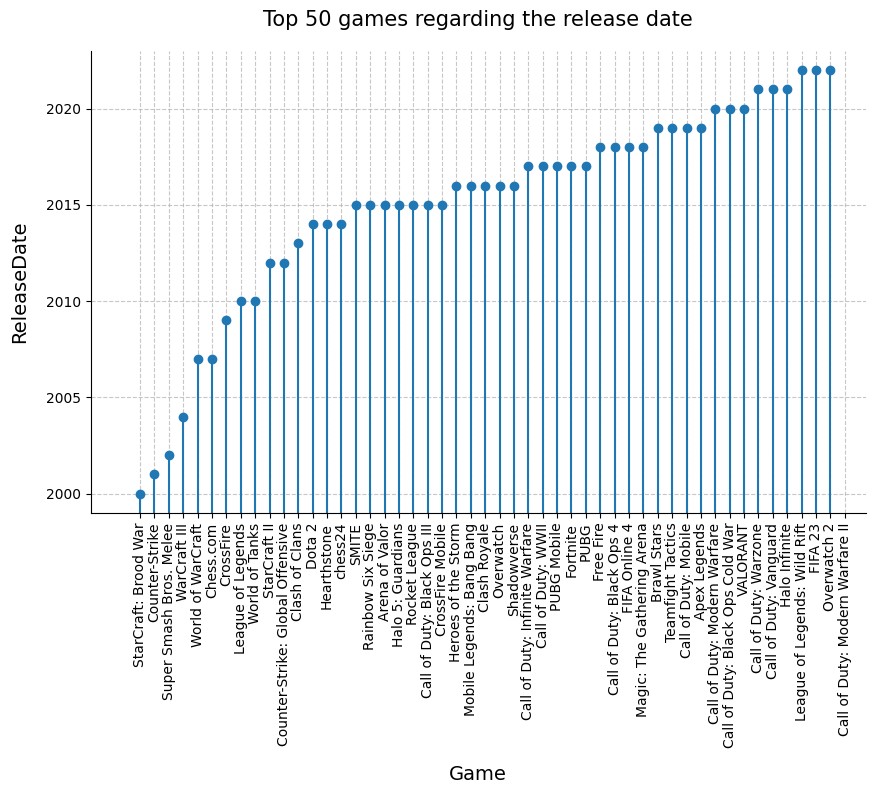

In [4]:
# Reorder it following the values
ordered_df = df.sort_values(by='ReleaseDate')

fig, ax = plt.subplots(figsize=(10, 6))  # create a figure and an axes object
ax.stem(ordered_df['ReleaseDate'])
ax.set_xticks(my_range)
ax.set_xticklabels(ordered_df['Game'], rotation = 90)

# Adding labels and title with style
plt.xlabel('Game', fontsize=14, labelpad=12)
plt.ylabel('ReleaseDate', fontsize=14, labelpad=12)
plt.title('Top 50 games regarding the release date', fontsize=15, pad=18)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylim(1999, 2023)

plt.show()

Short reminder that from here on I'll use PUBG instead of PLAYERUNKNOWN'S BATTLEGROUNDS when referring to that game and MOBA when referring to Multiplayer Online Battle Arena.

Now let's analyse the first chart with a small help of the second one:

In the first one we can see that Dota 2 has the by far biggest prize pool and right after we see Fortnite and CS:GO. The reason behind this really big prize pool in Dota 2 is simply because of a method they use which is crowdfunding. Regular players can buy certain items in the game itself and a small percentage of it goes to the prize pool. We can see that this helps the esports scene a lot and if implemented correctly just like in Dota 2 makes a massive difference. 
Talking about numbers: Dota 2 had over 300 million euro prize pool and since it got released in 2013 (we can see that in the 2nd chart) that makes around 30 million per year. Now let's put that all in perspective. 
In Germany one of the biggest traditional sports is football and the 2nd Bundesliga f.ex. had a revenue of 860 million euros in the season 20/21. But thats the whole revenue and not just the "prize pool" so far. If you become champion of the 2nd Bundesliga and play in the 1st Bundesliga the season after you get around 36 million bonus as a club. 

Another example is tennis: The largest prize pool in a Tennis event was the 2019 Australian Open which boasted a hefty $62 Million in total prize pool which is around two times the prize pool of Dota 2 which again is the biggest esports title.

So the dimensions are similar even tho we can see that the traditional sport leagues are still ahead. It also makes sense since esports is a way newer industry than traditional sports but we can see that esports is catching up.

As said before there are also other noteable games like Fortnite or CS:GO. They both have a prize pool of over 160 million each, so nearly half of Dota 2's prize pool. Here again we see that the crowdfunding that Dota 2 uses, helps a lot regarding prize pools. And as we can see the dropoff after these games is even bigger. 

Why is it those games? 

Overall we see the trend that games that are free-to-play meaning you do not have to pay a certain price to get those games which means they are more popular and therefore the esports scene is bigger since more people are interested in watching pro players. Also games that were released earlier tend to be at the top of the list. Regarding Fortnite which got released in 2017 you have to know that the developer of the game always tried to push the competitive/esports scene by hosting tournaments with real money as prizes which until today is something very special.

## 4.2. Answering second question

Let's go over to Q2: Herefore I used a treemap and added up the TotalEarnings of the top 50 games ordered by TotalEarnings in case they have the same genre. So the two columns I used were TotalEarnings as sizes and Genres as groups.

C:\Users\EgZoS\AppData\Local\Temp\ipykernel_33884\1518436218.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Spectral')  # Choose a color map


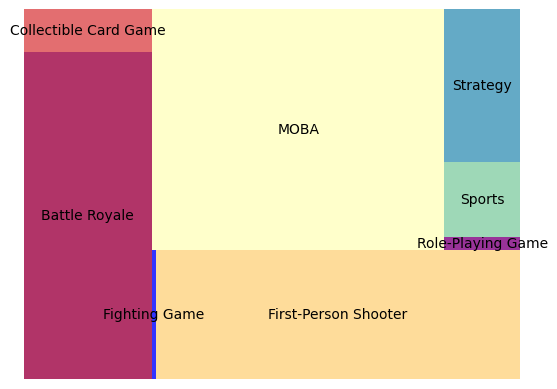

In [5]:
# Read the CSV file into a pandas DataFrame
db_uri = "sqlite:///data/GeneralEsportData.sqlite"


df = pd.read_sql_table("esports-earnings", db_uri)

# Filter the dataframe
df = df.nlargest(50, 'TotalEarnings')

df["Genre"] = df["Genre"].str.replace('Multiplayer Online Battle Arena', 'MOBA', regex=True)

# Group by 'Genre' and sum 'TotalEarnings' for each genre
genre_grouped = df.groupby('Genre')['TotalEarnings'].sum().reset_index()

# Create a color list (optional, you can customize this)
cmap = matplotlib.cm.get_cmap('Spectral')  # Choose a color map
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(genre_grouped['Genre']))
colours = [cmap(norm(i)) for i in range(len(genre_grouped['Genre']))]

colours[2] = "blue"
colours[5] = "purple"

# plot it
squarify.plot(sizes=genre_grouped['TotalEarnings'], label=genre_grouped['Genre'], alpha=.8, color=colours)
plt.axis('off')
plt.show()

In the treemap above we can see that MOBA's have the highest prize pools and then First-Person Shooter and Battle Royale right after. The rest of the genres really just be more small genres when it comes to earnings and the esports industry as a whole. It also makes sense because from a spectator point of view games that have a lot going on, are chaotic at times just seem to offer so much more entertainment than just card games or strategy games for example. It's about the heated moments you have in such genres and the more people are interested in watching or playing themselves the bigger the esport scene obviously. Another important fact to mention is that the PC scene is way bigger than the console scene, so you have way more people playing and competing on PC compared to console. But since fighting games or also sports games are more popular to play on the console and always have been it seems clear why they are smaller when it comes to earnings and prize pools even if these games can be action-loaded.



From now on we will have a closer look at one of the top games called Counter Strike: Global Offensive better known as CS:GO. It was released in 2012 and has drawn the attention of so many players. Also they were lots of tournaments hosted in that game.

## 4.3. Answering third question

So let's try and answer the question 3 by using a scatterplot and three histograms that tells us something about the prizes per year in CS:GO from the years 2020 to 2023 and about the correlation between the total prizes of events and the prizes won by teams that also won tournaments.

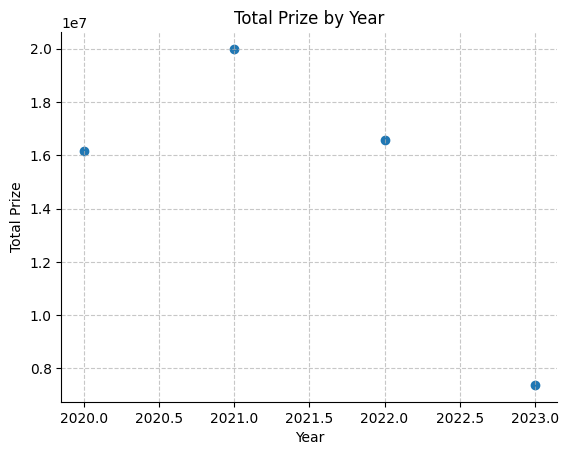

In [6]:
# Read the CSV file into a pandas DataFrame
db_uri = "sqlite:///data/last2000tournament.sqlite"


df = pd.read_sql_table("last-2000-csgo-tournament-hltv", db_uri)

# Define a function to convert the 'Prize' column to float, returning None for non-numeric entries
def convert_prize(prize_str):
    try:
        # Remove the dollar sign and commas, then convert to float
        return float(prize_str.replace('$', '').replace(',', ''))
    except ValueError:
        # Return None if conversion fails
        return None

# Apply the conversion function to the 'Prize' column
df['Prize'] = df['Prize'].apply(convert_prize)

# Drop rows with None in the 'Prize' column (non-numeric entries)
df = df.dropna(subset=['Prize'])

# Define a function to extract the year from the date string
def extract_year(date_str):
    # Split the string and take the last part, which should be the year
    return int(date_str.split()[-1])

# Apply the function to extract the year from the 'Date' column
df['Year'] = df['Date'].apply(extract_year)

# Group by the year and sum the 'Prize' values
df_grouped = df.groupby('Year')['Prize'].sum().reset_index()

# Now plot the aggregated data
plt.scatter(df_grouped['Year'], df_grouped['Prize'])
plt.xlabel('Year')
plt.ylabel('Total Prize')
plt.title('Total Prize by Year')

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

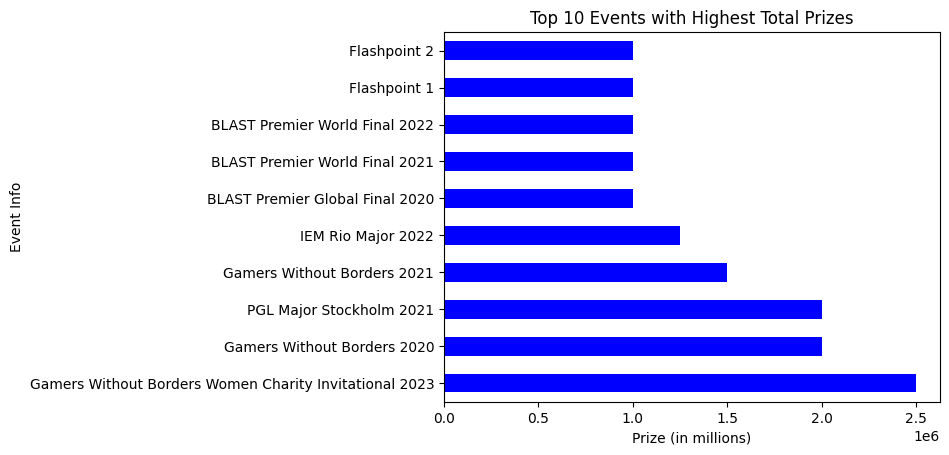

In [7]:
# Read the CSV file into a pandas DataFrame
db_uri = "sqlite:///data/last2000tournament.sqlite"
df = pd.read_sql_table("last-2000-csgo-tournament-hltv", db_uri)

# Define a function to convert the 'Prize' column to float, returning None for non-numeric entries
def convert_prize(prize_str):
    try:
        # Remove the dollar sign and commas, then convert to float
        return float(prize_str.replace('$', '').replace(',', ''))
    except ValueError:
        # Return None if conversion fails
        return None

# Apply the conversion function to the 'Prize' column
df['Prize'] = df['Prize'].apply(convert_prize)

# Group the DataFrame by 'Event Info' and calculate the total prize for each event
event_totals = df.groupby('Event Name')['Prize'].sum()

# Sort the events by total prize and select the top 10
top_events = event_totals.nlargest(10)

# Plot the sorted events with a horizontal bar plot
fig, ax = plt.subplots()
top_events.plot(kind='barh', ax=ax, color='blue')

# Customize the plot
ax.set_xlabel('Prize (in millions)')
ax.set_ylabel('Event Info')
ax.set_title('Top 10 Events with Highest Total Prizes')
plt.show()

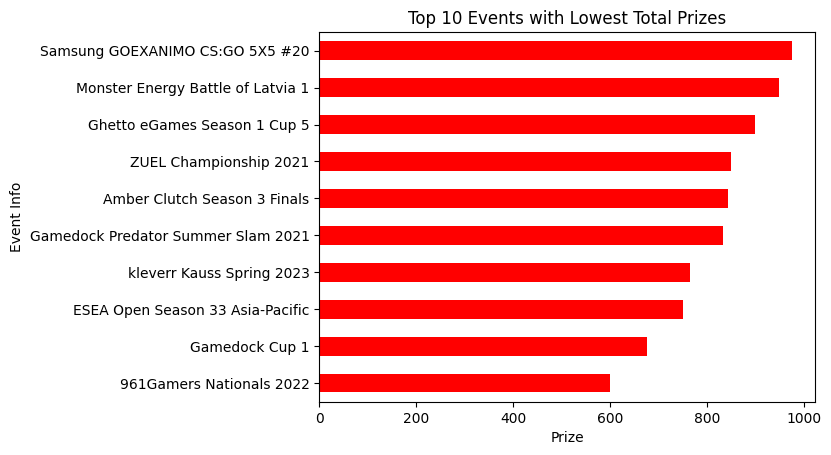

In [8]:
# Read the CSV file into a pandas DataFrame
db_uri = "sqlite:///data/last2000tournament.sqlite"
df = pd.read_sql_table("last-2000-csgo-tournament-hltv", db_uri)

# Define a function to convert the 'Prize' column to float, returning None for non-numeric entries
def convert_prize(prize_str):
    try:
        # Remove the dollar sign and commas, then convert to float
        return float(prize_str.replace('$', '').replace(',', ''))
    except ValueError:
        # Return None if conversion fails
        return None

# Apply the conversion function to the 'Prize' column
df['Prize'] = df['Prize'].apply(convert_prize)

# Group the DataFrame by 'Event Info' and calculate the total prize for each event
event_totals = df.groupby('Event Name')['Prize'].sum()

# Filter out events with a prize of zero
non_zero_events = event_totals[event_totals != 0]

# Sort the events by total prize and select the top 10
top_events = non_zero_events.nsmallest(10)

# Plot the sorted events with a horizontal bar plot
fig, ax = plt.subplots()
top_events.plot(kind='barh', ax=ax, color='red')

# Customize the plot
ax.set_xlabel('Prize')
ax.set_ylabel('Event Info')
ax.set_title('Top 10 Events with Lowest Total Prizes')
plt.show()

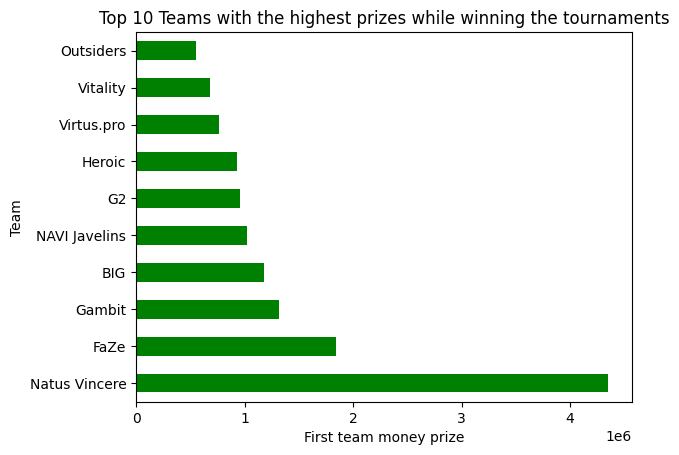

In [9]:
# Read the CSV file into a pandas DataFrame
db_uri = "sqlite:///data/last2000tournament.sqlite"
df = pd.read_sql_table("last-2000-csgo-tournament-hltv", db_uri)

# Replace the '-' character with 0 in the 'First Team Money Prize' column
df['First Team Money Prize'] = df['First Team Money Prize'].replace('-', '0')

# Define a function to convert the 'Prize' column to float, returning None for non-numeric entries
def convert_prize(prize_str):
    try:
        # Remove the dollar sign and commas, then convert to float
        return float(prize_str.replace('$', '').replace(',', ''))
    except ValueError:
        # Return None if conversion fails
        return 0

# Apply the conversion function to the 'Prize' column
df['First Team Money Prize'] = df['First Team Money Prize'].apply(convert_prize)

# Group the DataFrame by 'Event Info' and calculate the total prize for each event
teamName_totals = df.groupby('First Team')['First Team Money Prize'].sum()

# Sort the events by total prize and select the top 10
top_events = teamName_totals.nlargest(10)

# Plot the sorted events with a horizontal bar plot
fig, ax = plt.subplots()
top_events.plot(kind='barh', ax=ax, color='green')

# Customize the plot
ax.set_xlabel('First team money prize')
ax.set_ylabel('Team')
ax.set_title('Top 10 Teams with the highest prizes while winning the tournaments')
plt.show()

Let's disuss the first chart. There we can see that the Prizes in CS:GO are not fluctuating that much and in the year of 2020 and 2022 they had around 16 million prize pool while in 2021 they had a bit of a higher prize pool but really just same dimension. Don't get tricked by the fact that in 2023 it seems to be at an all time low, it's just because it only tracked the tournaments until the month of may so if you scale it, then you should also be around the same prize pool. This tells us that it seems to be a stable game where prize pools aren't something that just randomly go down in one year which is good if you wanna build and develop an industry. 

The next two charts really just show that a tournament itself can go from really high prizes to really low ones. The difference is insane. Again let's talk about tradition sports as a comparison. There you also have something like the Champion's League and Europe League f.ex. where the difference in money income for the clubs is also huge. We are obviously talking about higher numbers but the comparison still stands. Biggest CS:GO tournaments already broke the 2 million mark which is a great milestone. We can also see that in the top 10 events we have tournaments from all four years which also shows consistency again. The biggest prize was from a tournament in 2023 which shows growth.

About the last chart we say that there are special teams that win way more tournaments and therefore more money than others but to those top teams the prizes from tournaments seem like a stable income. CS:GO is played in a 5v5 so 5 players are on one team. Natus Vincere as a team was founded in 2013, so ten years ago and since then they have won a bit more than 4 million dollars and that's just from first places. So that is around 800 000 for each player and if you divide that by the ten years you still have an earning of around 80 000 for each player within one year. Of course that's the most or at least one of the most successful teams and maybe not the best example but we can see that it is possible to live off just the prize pools. 

## 5. Discussion

Ok now we have looked at different aspects and it is time to put them all together and go back to the main question which was if esports has grown into a profession over the last ten years. As it is the same in traditional sports, there is the elite with football, basketball etc. and also the ones not earning that much. Same really just goes for esports where you have games like CS:GO, Fortnite or Dota 2 where you earn more than enough to live a regular life but then there are the other games also from genres that aren't that interesting for most people to watch where it is really hard or nearly impossible unless you have a 2nd income.

But the fact that there is already ideas like we saw in Dota 2 where the prize pools are increased a lot by using crowdfunding or a very stable industry with regular tournaments that can get you enough money by participating and doing well, shows that this industry is indeed growing and getting bigger by time. We cannot guarantee that it will also succeed in the future but it looks promising to me and it's still very new. Many players are already so called esport-athletes, have big sponsorships and have a huge fanbase. Faker f.ex. a korean League of Legends player is a well known player in south korea and built his legacy over the last years. So it is possible and because it is and it's not just a handful players I would argue that it became a profession. When exactly this happened is hard to say but definitely within the last few years.

## 5.1. Outlook

In the end since it is an industry especially started and pushed by the younger generation we will definitely see it grow in the future in my opinion. Also the whole trend of digitalisation helps a lot because many tournaments can be held online and it makes the organisation so much easier and reduces lots of costs. I'm sure that esports as a profession will just be like any other sports athlete in the near future. It might still need to be more accessible to the older people in order to become a strong industry but I think there will be ways and efforts to create an unique experience for old and young people.